In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from fastai.vision.all import *
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pepsi-and-cocacola-images/test/pepsi/20.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/6.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/5.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/8.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/10.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/0.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/9.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/1.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/29.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/16.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/23.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/7.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/28.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/22.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/24.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/13.jpg
/kaggle/input/pepsi-and-cocacola-images/test/pepsi/17.jpg
/kaggle/input/pepsi-a

In [2]:
cokePath = '/kaggle/input/pepsi-and-cocacola-images/train/cocacola/'
pepsiPath = '/kaggle/input/pepsi-and-cocacola-images/train/pepsi/'
os.listdir(cokePath)
#dfp_train = pd.read_csv('/kaggle/input/pepsi-and-cocacola-images/train/pepsi')

['45.jpg',
 '56.jpg',
 '89.jpg',
 '58.jpg',
 '150.jpg',
 '109.jpg',
 '149.jpg',
 '187.jpg',
 '76.jpg',
 '71.jpg',
 '182.jpg',
 '185.jpg',
 '153.jpg',
 '189.jpg',
 '143.jpg',
 '115.jpg',
 '131.jpg',
 '151.jpg',
 '84.jpg',
 '85.jpg',
 '67.jpg',
 '118.jpg',
 '82.jpg',
 '176.jpg',
 '30.jpg',
 '97.jpg',
 '106.jpg',
 '163.jpg',
 '113.jpg',
 '160.jpg',
 '38.jpg',
 '42.jpg',
 '197.jpg',
 '33.jpg',
 '178.jpg',
 '54.jpg',
 '130.jpg',
 '62.jpg',
 '156.jpg',
 '120.jpg',
 '35.jpg',
 '61.jpg',
 '190.jpg',
 '124.jpg',
 '191.jpg',
 '59.jpg',
 '73.jpg',
 '188.jpg',
 '98.jpg',
 '41.jpg',
 '123.jpg',
 '94.jpg',
 '60.jpg',
 '167.jpg',
 '57.jpg',
 '112.jpg',
 '193.jpg',
 '152.jpg',
 '192.jpg',
 '91.jpg',
 '101.jpg',
 '99.jpg',
 '37.jpg',
 '177.jpg',
 '186.jpg',
 '69.jpg',
 '75.jpg',
 '117.jpg',
 '81.jpg',
 '46.jpg',
 '137.jpg',
 '44.jpg',
 '65.jpg',
 '50.jpg',
 '127.jpg',
 '196.jpg',
 '140.jpg',
 '79.jpg',
 '179.jpg',
 '105.jpg',
 '111.jpg',
 '55.jpg',
 '145.jpg',
 '135.jpg',
 '77.jpg',
 '166.jpg',
 '80.jp

In [3]:
from fastai import *
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision




In [4]:
train_transform = transforms.Compose([transforms.Resize((150,150)),
                                     transforms.RandomCrop(149),
                                     transforms.ToTensor(),
                                     transforms.RandomHorizontalFlip()])
test_transform = transforms.Compose([transforms.Resize((150,150)),
                                     transforms.ToTensor()
                                     ])

In [5]:
#train and test image datasets

train_data = torchvision.datasets.ImageFolder("../input/pepsi-and-cocacola-images/train",transform =train_transform )
test_data = torchvision.datasets.ImageFolder("../input/pepsi-and-cocacola-images/test", transform = test_transform)
valid_size = 0.2

num_train = len(train_data)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))
np.random.shuffle(indices)

from torch.utils.data.sampler import SubsetRandomSampler
train_idx, test_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)



In [6]:
from torch.utils.data.sampler import SubsetRandomSampler



trainloader = torch.utils.data.DataLoader(train_data, batch_size=32) #adjusted to 32
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

Set device if available

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [8]:
model = models.resnet50(pretrained=True)
print(model)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
for param in model.parameters():
    param.requires_grad = False
    
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 10),
                                 nn.LogSoftmax(dim=1))
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.fc.parameters(), lr=0.005)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
epochs = 10
steps = 0
running_loss = 0
print_every = 10
train_losses, test_losses = [], []

for epoch in range(epochs):
    
    for inputs, labels in trainloader:
        
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in testloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    test_loss += batch_loss.item()
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(testloader))                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            running_loss = 0
            #model.train()
            model.eval()


Epoch 1/10.. Train loss: 35.675.. Test loss: 12.065.. Test accuracy: 0.531
Epoch 2/10.. Train loss: 12.327.. Test loss: 1.244.. Test accuracy: 0.469
Epoch 3/10.. Train loss: 1.036.. Test loss: 0.540.. Test accuracy: 0.917
Epoch 4/10.. Train loss: 1.463.. Test loss: 0.577.. Test accuracy: 0.612
Epoch 5/10.. Train loss: 0.576.. Test loss: 0.577.. Test accuracy: 0.612
Epoch 6/10.. Train loss: 0.633.. Test loss: 0.410.. Test accuracy: 0.888
Epoch 7/10.. Train loss: 0.374.. Test loss: 0.334.. Test accuracy: 0.933
Epoch 8/10.. Train loss: 0.351.. Test loss: 0.281.. Test accuracy: 0.933
Epoch 9/10.. Train loss: 0.279.. Test loss: 0.257.. Test accuracy: 0.917
Epoch 10/10.. Train loss: 0.242.. Test loss: 0.219.. Test accuracy: 0.933
Epoch 10/10.. Train loss: 0.197.. Test loss: 0.202.. Test accuracy: 0.933


In [11]:
torch.save(model, 'aerialmodel.pth')

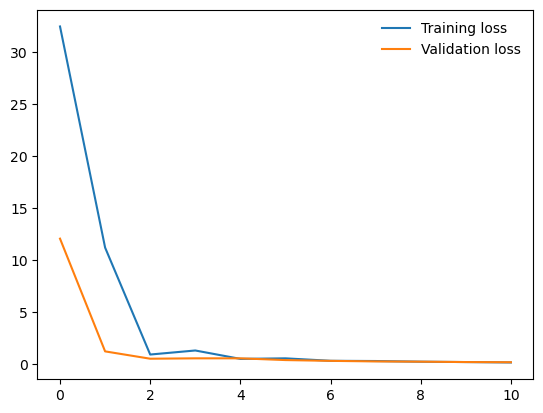

In [12]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [13]:
data_dir = '/kaggle/input/pepsi-and-cocacola-images/train/'
print(len(data_dir))
test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.ToTensor(),
                                     ])


46


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=torch.load('aerialmodel.pth')
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = image_tensor.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index


Now for easier testing, I also created a function that will pick a number of random images from the dataset folders:

In [16]:
def get_random_images(num):
    data = datasets.ImageFolder(data_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, sampler=sampler, batch_size=num)
    #dataiter = iter(loader)
    for i, x in loader:
        images, labels = i, x
    return i, x #dataiter




tensor([[[[1.0000, 0.9961, 0.9961,  ..., 0.9333, 0.9255, 0.9294],
          [0.9961, 0.9961, 0.9882,  ..., 0.9373, 0.9373, 0.9333],
          [0.9922, 1.0000, 0.9961,  ..., 0.9255, 0.9294, 0.9255],
          ...,
          [0.9961, 0.9961, 0.9961,  ..., 0.9373, 0.9294, 0.9294],
          [0.9961, 0.9961, 0.9961,  ..., 0.9373, 0.9294, 0.9294],
          [0.9961, 0.9961, 0.9961,  ..., 0.9373, 0.9294, 0.9294]],

         [[1.0000, 0.9961, 0.9961,  ..., 0.9333, 0.9255, 0.9294],
          [0.9961, 0.9961, 0.9882,  ..., 0.9373, 0.9373, 0.9333],
          [0.9922, 1.0000, 0.9961,  ..., 0.9255, 0.9294, 0.9255],
          ...,
          [0.9961, 0.9961, 0.9961,  ..., 0.9373, 0.9294, 0.9294],
          [0.9961, 0.9961, 0.9961,  ..., 0.9373, 0.9294, 0.9294],
          [0.9961, 0.9961, 0.9961,  ..., 0.9373, 0.9294, 0.9294]],

         [[1.0000, 0.9961, 0.9961,  ..., 0.9333, 0.9255, 0.9294],
          [0.9961, 0.9961, 0.9882,  ..., 0.9373, 0.9373, 0.9333],
          [0.9922, 1.0000, 0.9961,  ..., 0

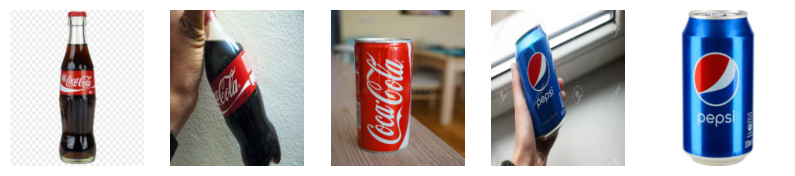

In [17]:
import PIL

to_pil = transforms.ToPILImage()
images, labels = get_random_images(5)
print(images)
print(labels)
fig=plt.figure(figsize=(10,10))
for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    #sub.set_title(str(classes[index]) + ":" + str(res))
    plt.axis('off')
    plt.imshow(image)
plt.show()